# Random Forest

In [61]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rc('font',family = 'NanumGothicCoding')

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [62]:
df_raw = pd.read_csv("./data/Concrete.csv", encoding = '949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [63]:
df_raw.isnull().sum()

CEMENT                           0
BLAST_FURNACE_SLAG               0
FLY_ASH                          0
WATER                            0
SUPERPLASTICIZER                 0
COARSE_AGGREGATE                 0
FINE_AGGREGATE                   0
AGE                              0
CONCRETE_COMPRESSIVE_STRENGTH    0
dtype: int64

In [64]:
df_raw_y = df_raw['CONCRETE_COMPRESSIVE_STRENGTH']
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)
df_raw_x.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [65]:
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_validation_x.shape))
print('test data Y size : {}'.format(df_validation_y.shape))


train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [66]:
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               , test_size = 0.4, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation X size : {}'.format(df_validation_x.shape))
print('validation Y size : {}'.format(df_validation_y.shape))


train data X size : (432, 8)
train data Y size : (432,)
validation X size : (289, 8)
validation Y size : (289,)


### 모델생성
- 기본 옵션으로 트리 생성

In [68]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
### 모델생성
#- 기본 옵션으로 트리 생성
print('Score on trainning set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(rf_uncustomized.score(df_validation_x, df_validation_y)))

Score on trainning set : 0.972
Score on test set : 0.817


> test set의 데이터가 설명력이 괜찮은 편이다. 과대적합은 아닌듯 보여진다

In [69]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

### 트리 갯수 변경에 따른 모델 성능

In [70]:
train_score = [];test_score=[]
para_n_tree = [n_tree * 5 for n_tree in range(1,50)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_validation_x, df_validation_y))
    
#저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n['Gap'] = np.array(train_score)-np.array(test_score)

In [71]:
df_score_n.round(3).head(15)

,n_estimators,TrainScore,TestScore,Gap
0,5,0.959,0.802,0.158
1,10,0.972,0.817,0.156
2,15,0.977,0.828,0.150
3,20,0.978,0.828,0.150
4,25,0.979,0.829,0.150
5,30,0.979,0.828,0.152
6,35,0.980,0.827,0.153
7,40,0.980,0.827,0.153
8,45,0.981,0.829,0.152
9,50,0.981,0.830,0.151


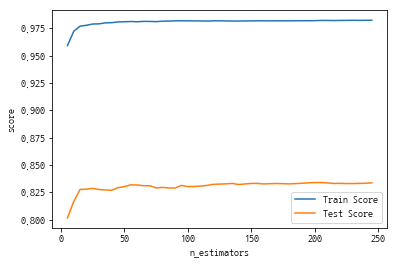

In [72]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score');plt.xlabel('n_estimators')
plt.legend()

> n_estimator가 60일때, 트리의 수가 60일 때, TestScore와 TrainScore의 값의 간격이 좁고 TestScore값이 좋게 나온다

### Leaf Node 의 최소 자료 수 변경에 따른 모델 성능

In [73]:
train_score = [];test_score=[]
para_leaf = [n_tree * 1 for n_tree in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 60,
                              min_samples_leaf = v_min_samples_leaf)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_validation_x, df_validation_y))
    
#저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf['Gap'] = np.array(train_score)-np.array(test_score)

In [74]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore,Gap
0,1,0.981,0.832,0.149
1,2,0.968,0.821,0.147
2,3,0.952,0.814,0.138
3,4,0.937,0.806,0.131
4,5,0.923,0.795,0.128
5,6,0.910,0.787,0.123
6,7,0.899,0.778,0.121
7,8,0.888,0.769,0.119
8,9,0.876,0.763,0.114
9,10,0.868,0.756,0.111


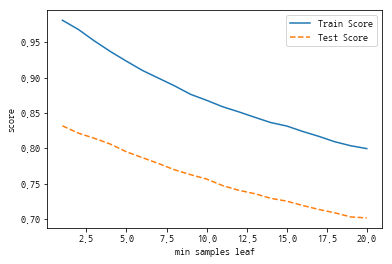

In [75]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples leaf')
plt.legend()

> leaf node가 `8개` 일 때, test score의 값이 좋기 때문에 `적어도 leaf node가 8`는 되야됨, 또한 Testscore와 TrainScore의 간격이 그나마 좁은편이다

### 분리노드(Splite)의 최소 자료 수 변경에 따른 모델 성능

In [76]:
train_score = [];test_score=[]
para_split = [n_tree * 2 for n_tree in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 60, min_samples_leaf = 8,
                              min_samples_split = v_min_samples_split)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_validation_x, df_validation_y))
    
#저장
df_score_split = pd.DataFrame()
df_score_split['n_Splite'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split['Gap'] = np.array(train_score)-np.array(test_score)
df_score_split.round(3)

,n_Splite,TrainScore,TestScore,Gap
0,4,0.888,0.769,0.119
1,6,0.888,0.769,0.119
2,8,0.888,0.769,0.119
3,10,0.888,0.769,0.119
4,12,0.888,0.769,0.119
5,14,0.888,0.769,0.119
6,16,0.888,0.769,0.119
7,18,0.881,0.766,0.115
8,20,0.875,0.762,0.113
9,22,0.869,0.759,0.111


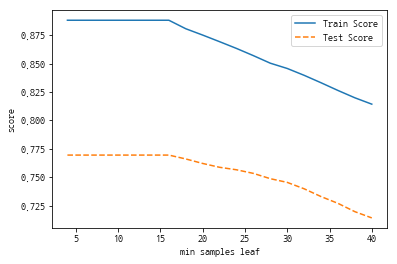

In [77]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples leaf')
plt.legend()

> 최소로 4번 정도 분할하면 적절하다

### 최대깊이 변경에 따른 모델 성능

In [78]:
train_score = [];test_score=[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 60,
                              min_samples_leaf = 8, min_samples_split = 4,
                              max_depth = v_max_depth)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_validation_x, df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth['Gap'] = np.array(train_score)-np.array(test_score)
df_score_depth.round(3)

,Depth,TrainScore,TestScore,Gap
0,1,0.393,0.327,0.067
1,2,0.635,0.543,0.092
2,3,0.757,0.643,0.114
3,4,0.828,0.712,0.116
4,5,0.869,0.751,0.118
5,6,0.884,0.764,0.119
6,7,0.888,0.769,0.119
7,8,0.888,0.769,0.119
8,9,0.888,0.769,0.119
9,10,0.888,0.769,0.119


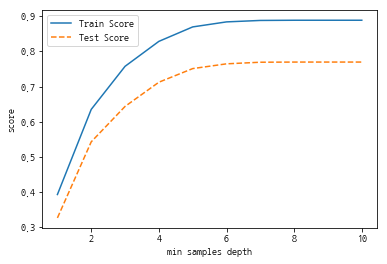

In [79]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score');plt.xlabel('min samples depth')
plt.legend()

> Depth가 6일 때 TestScore의 값이 가장 좋음

### 결과도출

In [80]:
rf_final = RandomForestRegressor(random_state = 1234, n_estimators = 60, min_samples_leaf = 8,
                                min_samples_split = 4, max_depth = 6)
rf_final.fit(df_train_x, df_train_y)
print('Score on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(rf_final.score(df_validation_x, df_validation_y)))

rf_final

Score on training set : 0.884
Score on test set : 0.764


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

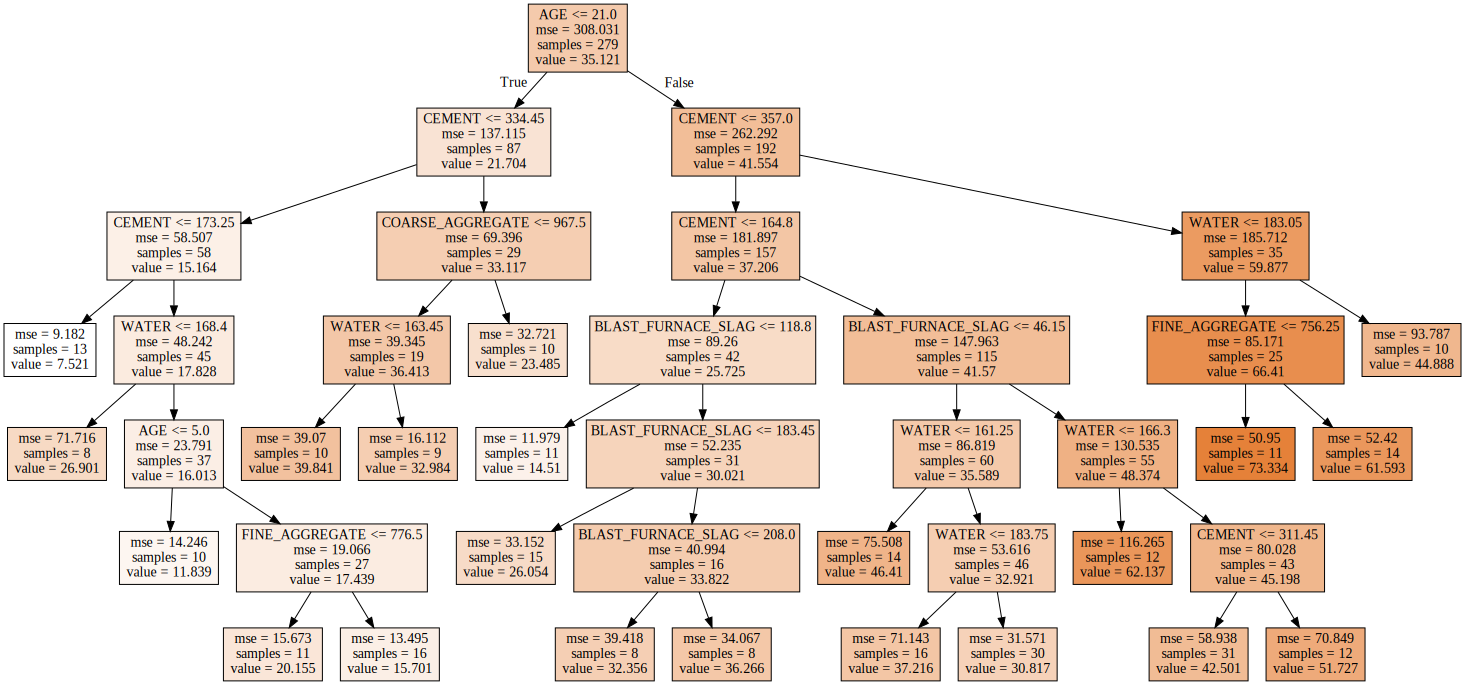

In [81]:
v_feature_names = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file = 'rfr_final_0.dot', feature_names = v_feature_names, impurity = True, filled = True)

with open('rfr_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

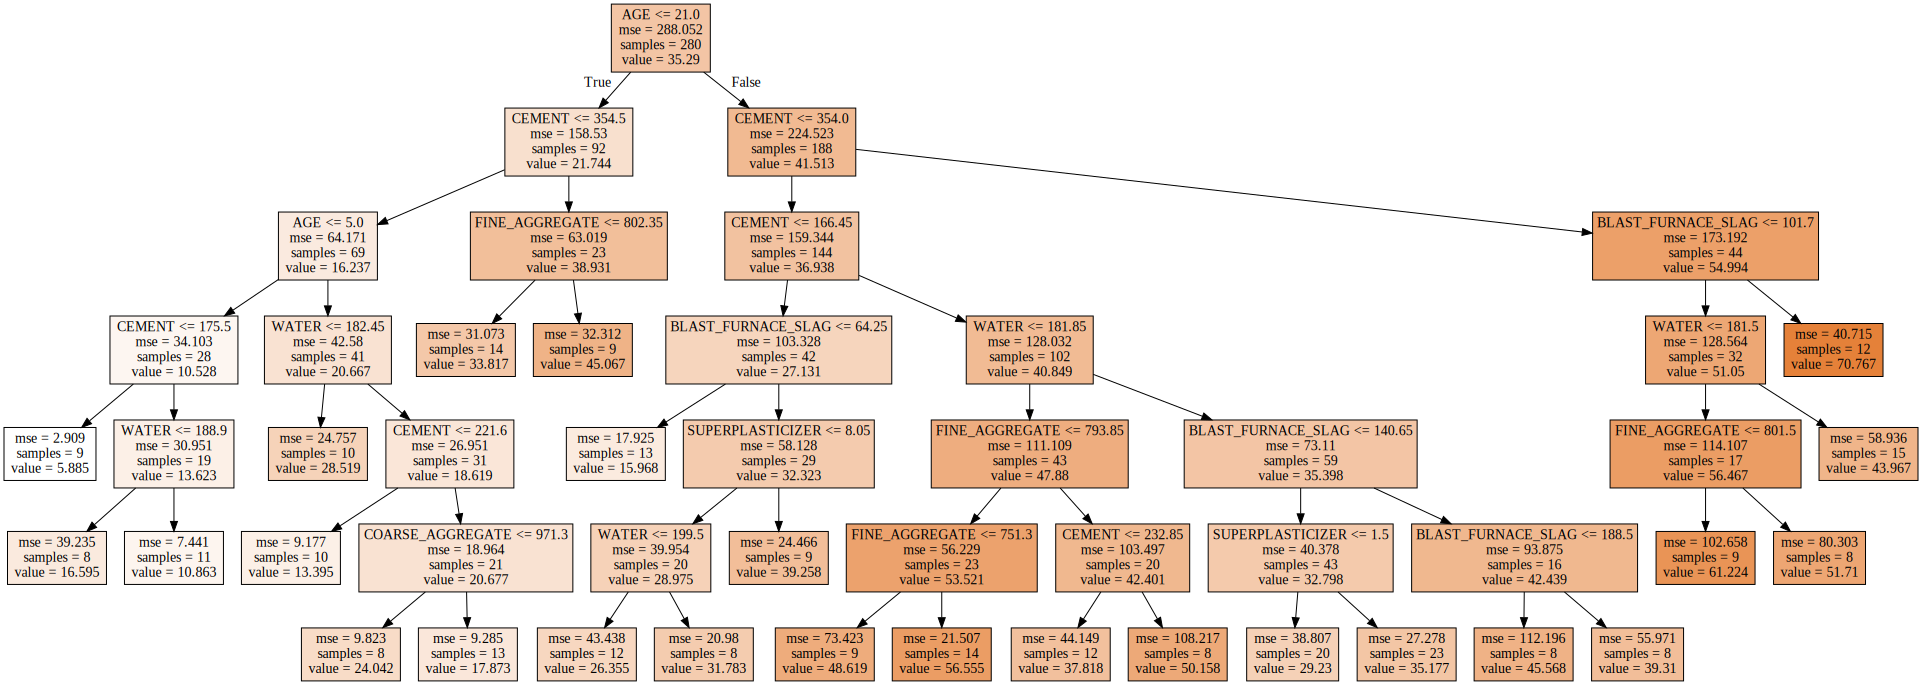

In [82]:
export_graphviz(rf_final.estimators_[1], out_file = 'rfr_final_1.dot', feature_names = v_feature_names, impurity = True, filled = True)

with open('rfr_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [83]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.373
0,CEMENT,0.320
3,WATER,0.183
1,BLAST_FURNACE_SLAG,0.051
6,FINE_AGGREGATE,0.025
4,SUPERPLASTICIZER,0.025
2,FLY_ASH,0.013
5,COARSE_AGGREGATE,0.010


Text(0, 0.5, '변수')

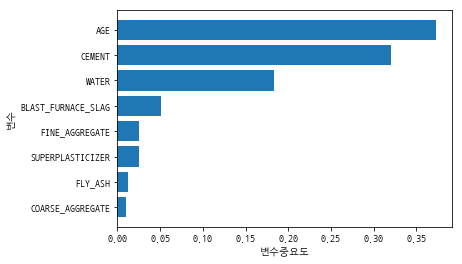

In [84]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

In [85]:
estimator = RandomForestRegressor(random_state = 1234)

#구하고자 하는 parameter와 범위
param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n {}'.format(grid_dt.best_estimator_))
print('\n nbest parameter : \n {}'.format(grid_dt.best_params_))
print('\n best score: \n {}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

 nbest parameter : 
 {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}

 best score: 
 0.832


In [86]:

print('Score on trainning set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on trainning set : 0.884
Score on test set : 0.802


In [87]:
x_pred = rf_final.predict(df_test_x)
print('mae : {:.3f}'.format(mean_absolute_error(df_test_y, x_pred)))
print('mse : {:.3f}'.format(mean_squared_error(df_test_y, x_pred)))

mae : 5.714
mse : 51.578
